## Particle in a box.

colab 링크: https://colab.research.google.com/drive/1ECLiUQU1LZpm1rb3o7bt407-aCWc_vvy?usp=sharing

Particle in a box는 infinite potential well에 붙잡힌 particle의 Energy state를 계산하는 간단한 문제입니다.

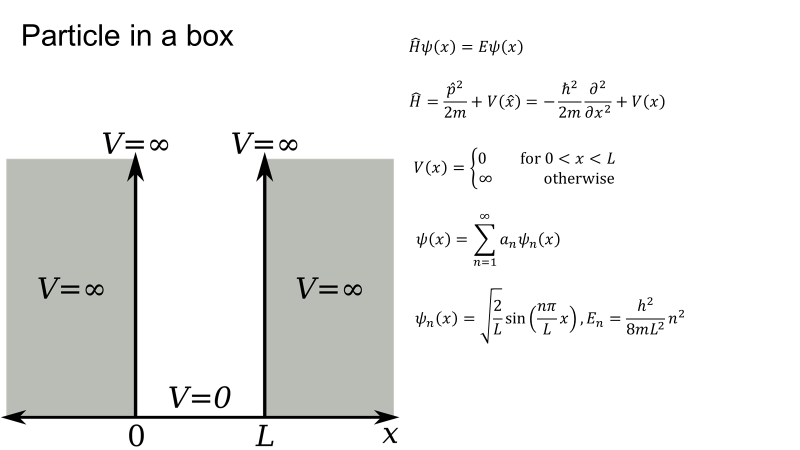

Particle in a box의 경우에 대한 Schrödinger equation을 계산하는 것은 수업시간에 진행했습니다.

위의 결과에서, particle의 위치 x를 특정하게 되는 경우, particle의 energy state(=momentum)을 특정하지 못하고,

반대로 particle의 energy state를 특정하게 되는 경우, particle의 위치를 특정할 수 없게 된다는 사실을 배웠습니다.

이는 Uncertainty principle으로 잘 알려진 결과입니다.

이를 시각적으로 확인시켜주기 위해, 다음과 같은 python code를 작성했습니다.

이는 다음과 같은 식의 결과를 반영하는 결과입니다.

### $$\langle x | y \rangle =  \sum_{m=1}^{\infty} \psi_m(x) \psi_m(y)$$ 

### $$|\langle x | y \rangle |^2= \delta(x-y) $$ 

밑의 코드는 다음과 같은 식을 계산하는 코드입니다.

### $$f_n(x-y) = |\sum_{m=1}^{n} \psi_m(x) \psi_m(y)|^2$$

n의 값이 커짐에 따라 $f_n(x-y)$의 결과가 어떻게 바뀌는지 시각적으로 확인해보시기 바랍니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
L : potential well의 width
y : particle의 위치
'''

L = 100
y = 50
x = np.linspace(0,L,10000)

수업시간에 구한 $\psi_n(x)$은 python numpy로 다음과 같이 작성이 가능합니다.

In [3]:
def psi_n(x,n,L):
    return np.sqrt(2/L)*np.sin(n/L*np.pi*x)

위에서 쓴 $f_n(x-y) = |\sum_{m=1}^{n} \psi_m(x) \psi_m(y)|^2$을 python으로 다음과 같이 작성할 수 있습니다.

In [4]:
# 충분히 큰 n에서 결과가 dirac delta가 될 것으로 예상하기에, 함수 이름을 dirac_delta로 지었습니다.

def f(x,y,n,L):
    result = 0
    for m in range(1,n+1):
        result += psi_n(x,m,L)*psi_n(y,m,L)
    
    result = result**2
    return result

위에서 정의한 식을 이용해서 n 값을 바꿔가면서 $f_n(x-y)$를 graph로 그려봤습니다.

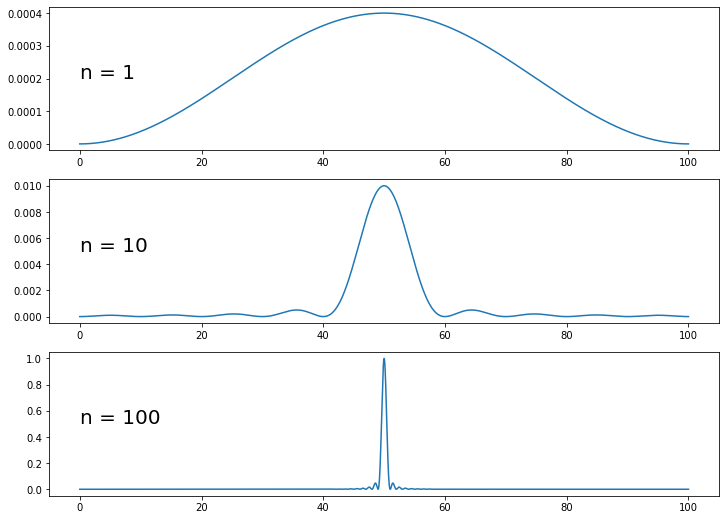

In [5]:
plt.figure(figsize = (12,9))

plt.subplot(3, 1, 1)
number = 1
value_1 = f(x,y,number,L)
plt.text(0,0.0002,f'n = {number}',fontsize=20)
plt.plot(x,value_1)

plt.subplot(3, 1, 2)
number = 10
value_1 = f(x,y,number,L)
plt.text(0,0.005,f'n = {number}',fontsize=20)
plt.plot(x,value_1)

plt.subplot(3, 1, 3)
number = 100
value_1 = f(x,y,number,L)
plt.text(0,0.5,f'n = {number}',fontsize=20)
plt.plot(x,value_1)


예상한대로, n 값이 커짐에 따라 $\delta(x-50)$의 결과로 수렴함을 확인할 수 있었습니다.

아래의 code는 2의 배수에 해당하는 n에 대해 $f_n(x)$의 결과를 구하고, 이를 한번에 모아서 result.gif 파일로 만드는 code입니다. 

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [7]:
filenames = []

for m in range(1,15):
    plt.figure(figsize=(8,6))
    plt.plot(x,f(x,y,2**m,L))
    number = 2**m
    plt.text(0, 0, f'n = {number}', fontsize = 20)
    filename = f'{m}.png' # f-string
    filenames.append(filename)
    
    plt.savefig(filename)
    plt.close()
    
with imageio.get_writer('result.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        writer.append_data(image)

for filename in set(filenames):
    os.remove(filename)